In [3]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [4]:
# Load the dataset
url = 'https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv'
penguins = pd.read_csv(url)
df = penguins.copy()

- Data Cleaning and Exploratory Analysis

In [5]:
# we have 344 rows, 8 columns. we have missings. Maybe i'll change year type to datetime
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


In [6]:
df['year'] = pd.to_datetime(df['year'], format='%Y')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   species            344 non-null    object        
 1   island             344 non-null    object        
 2   bill_length_mm     342 non-null    float64       
 3   bill_depth_mm      342 non-null    float64       
 4   flipper_length_mm  342 non-null    float64       
 5   body_mass_g        342 non-null    float64       
 6   sex                333 non-null    object        
 7   year               344 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(3)
memory usage: 21.6+ KB


In [8]:
df.head(20) 

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007-01-01
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007-01-01
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007-01-01
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007-01-01
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007-01-01
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007-01-01
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female,2007-01-01
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male,2007-01-01
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,2007-01-01
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,2007-01-01


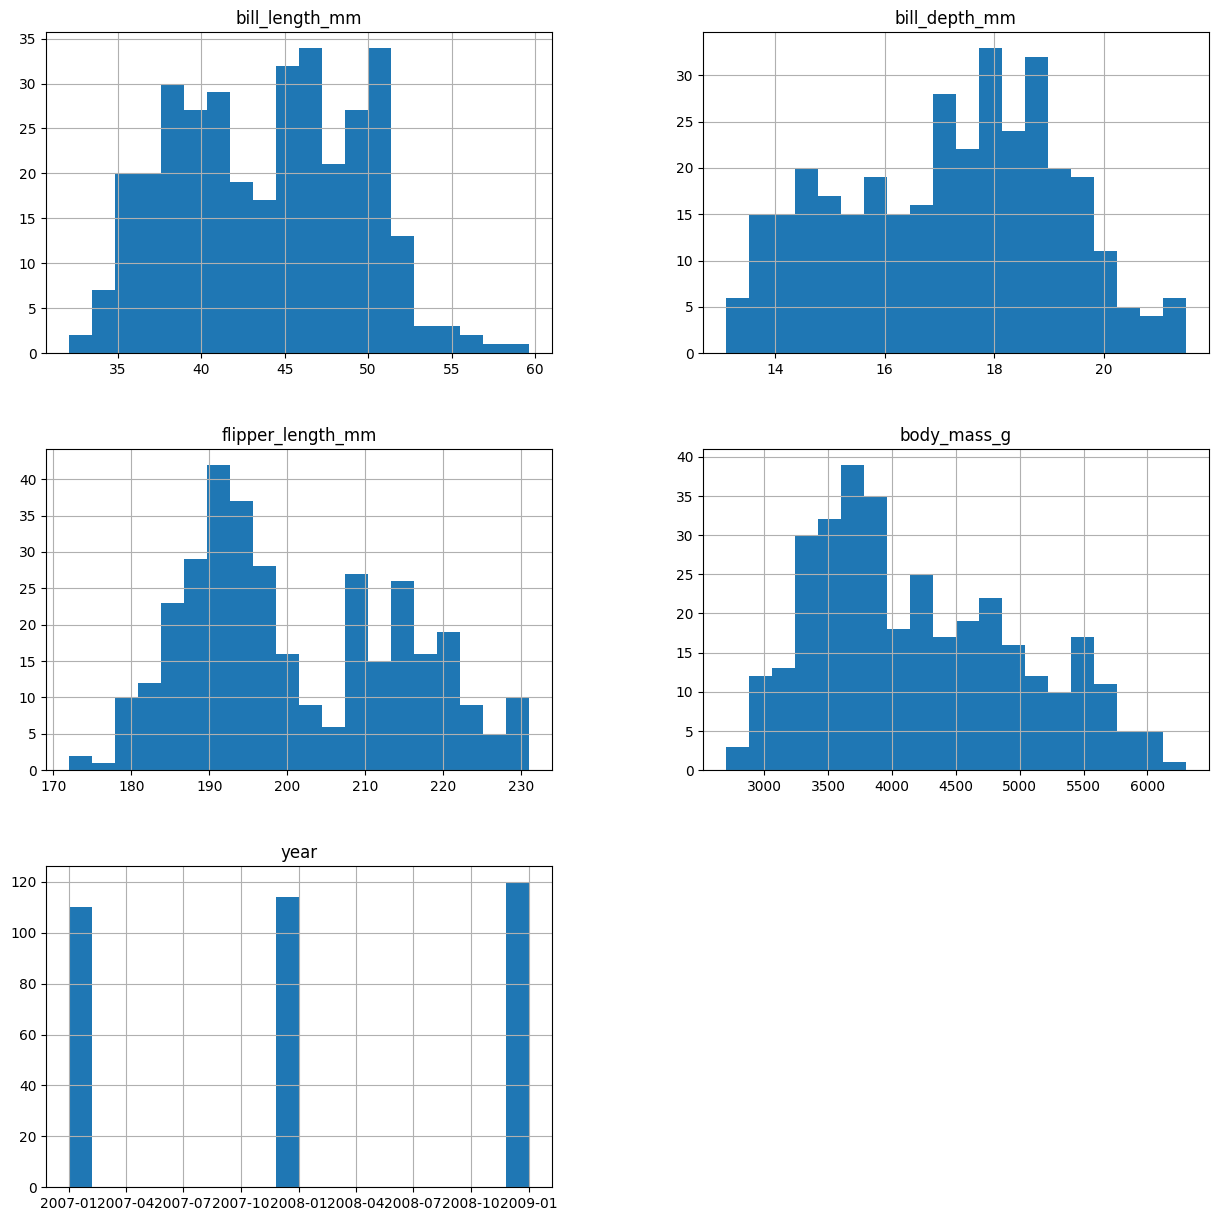

In [9]:
df.hist(figsize=(15,15), bins=20)
plt.show()

In [10]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [11]:
rows_with_missing = df[df.isnull().any(axis=1)]
print(rows_with_missing)

    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
3    Adelie  Torgersen             NaN            NaN                NaN   
8    Adelie  Torgersen            34.1           18.1              193.0   
9    Adelie  Torgersen            42.0           20.2              190.0   
10   Adelie  Torgersen            37.8           17.1              186.0   
11   Adelie  Torgersen            37.8           17.3              180.0   
47   Adelie      Dream            37.5           18.9              179.0   
178  Gentoo     Biscoe            44.5           14.3              216.0   
218  Gentoo     Biscoe            46.2           14.4              214.0   
256  Gentoo     Biscoe            47.3           13.8              216.0   
268  Gentoo     Biscoe            44.5           15.7              217.0   
271  Gentoo     Biscoe             NaN            NaN                NaN   

     body_mass_g  sex       year  
3            NaN  NaN 2007-01-01  
8         3475.0 

In [12]:
# i'll drop rows with index 3 and 271
df = df.drop([3,271])
print(df.isnull().sum())

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  9
year                 0
dtype: int64


In [13]:
# i'll drop rows 9 rows with missings
df = df.dropna()
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64

In [14]:
# ## Plot

# sns.distplot(df3.rate)
# plt.axvline(UC, color='r')
# plt.axvline(LC, color ='r')
# plt.axvline(Q1, color='g')
# plt.axvline(Q3, color='g')
# plt.show()

 - Visualization

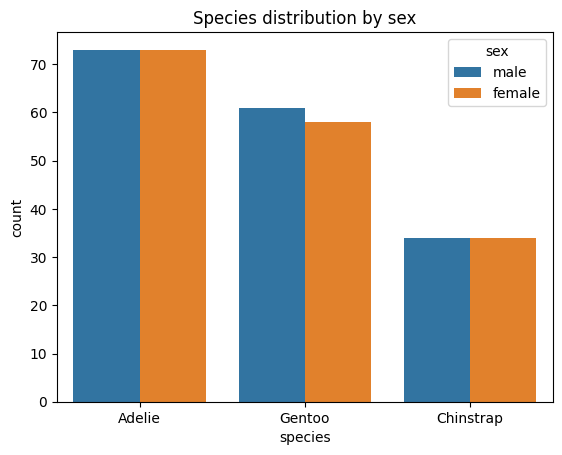

In [16]:
# The number of Adelie penguins prevails over other specie. Almost equal numbers male/female penguins. 
species_distribution = sns.countplot(
    data = df, x = 'species', hue = 'sex')
species_distribution.set_title('Species distribution by sex')
plt.show()

In [ ]:
# i see correlation between flipper length and body mass. Gentoo penguins is biggest species. 
flipper_length = sns.scatterplot(
data = df, x='flipper_length_mm', y='body_mass_g', hue='species'
)
flipper_length.set_title('Flipper Length vs.Body Mass by species')
plt.show()

In [ ]:
# most of penguines live in Biscoe and Dream islands. 


# Calculate count of penguins on each island
penguins_per_island = df['island'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(penguins_per_island, labels=penguins_per_island.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Penguins on Each Island')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

In [ ]:
# i сofirmed correlation between flipper length and body mass. I think we can see correlation between bill length and flipper length. 

# Exclude non-numeric columns from correlation calculation
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
correlation_matrix = numeric_columns.corr()
sns.set_theme()
cor_df = sns.heatmap(correlation_matrix, annot=True, linewidths=.5, cmap='Blues')
cor_df.set_title('Heatmap of Correlations')
plt.show()

In [ ]:
# we have outliers in our dataset
for col in numeric_columns:
    box_col = sns.boxplot(data = df, x=col, hue='species')
    box_col.set_title('checking for outliers in ' + col)
    plt.show()

In [ ]:
# in numeric columns we dont have a normal destribution
for col in numeric_columns:
    hist_plot = sns.histplot(data = df, x=col, kde=True)
    hist_plot.set_title('test ' + col)
    plt.show()

In [ ]:
# its good option to visualize pairwise relationships in the dataset
sns.set_theme(style="ticks")
sns.pairplot(df, hue="species")
plt.show()

# Conclusion

Dataset Overview: The dataset comprises 344 rows and 8 columns.

1. Data Preparation:
- Missing Values: The dataset contains missing values which need to be addressed.
- Data Type Adjustment: Consider converting the 'year' column to datetime format for easier manipulation.
- Data Cleaning: Rows with index 3 and 271, as well as 9 rows with missing values, will be dropped.

2. Species Distribution:
- Adelie penguins are the predominant species in the dataset, with a nearly equal distribution between male and female individuals.
- Gentoo penguins are identified as the largest species.

3. Island Distribution:
- Biscoe and Dream islands harbor the majority of penguins, indicating these locations are the most populated habitats.

4. Correlation Analysis:
- A positive correlation is observed between flipper length and body mass.
- Potential correlations between bill length and flipper length are suggested for further exploration.

5. Outlier Detection:
- Outliers are noted within the dataset, warranting further investigation.